In [1]:
import torch

In [13]:
import gpytorch
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
from torch.autograd import Variable

In [7]:
class GP(gpytorch.models.ExactGP):
    def __init__(self, train_x, train_y, likelihood):
        super(GP, self).__init__(train_x, train_y, likelihood)
        self.mean_module = gpytorch.means.ConstantMean()
        self.covar_module = gpytorch.kernels.RBFKernel()
        
    def forward(self, x):
        mean = self.mean_module(x)
        covar = self.covar_module(x)
        return gpytorch.random_variables.GaussianRandomVariable(mean, covar)

In [249]:
train_y = Variable(torch.Tensor([-2, 0, 0.5, -1.4, -1.5, -2, 1])) * 0.5
train_x = Variable(torch.Tensor([-4, -3, -1, -0.075, 2, 3, 4]))
likelihood = gpytorch.likelihoods.GaussianLikelihood()
model = GP(train_x.data, train_y.data, likelihood)
model.covar_module.log_lengthscale.data.fill_(-0.5)
likelihood.log_noise.data.fill_(-5)


-5
[torch.FloatTensor of size 1]

In [252]:
test_x = Variable(torch.linspace(-15, 15, 501))
model.eval()
output = model(test_x)
samples = output.sample(25)
lower, upper = output.confidence_region()

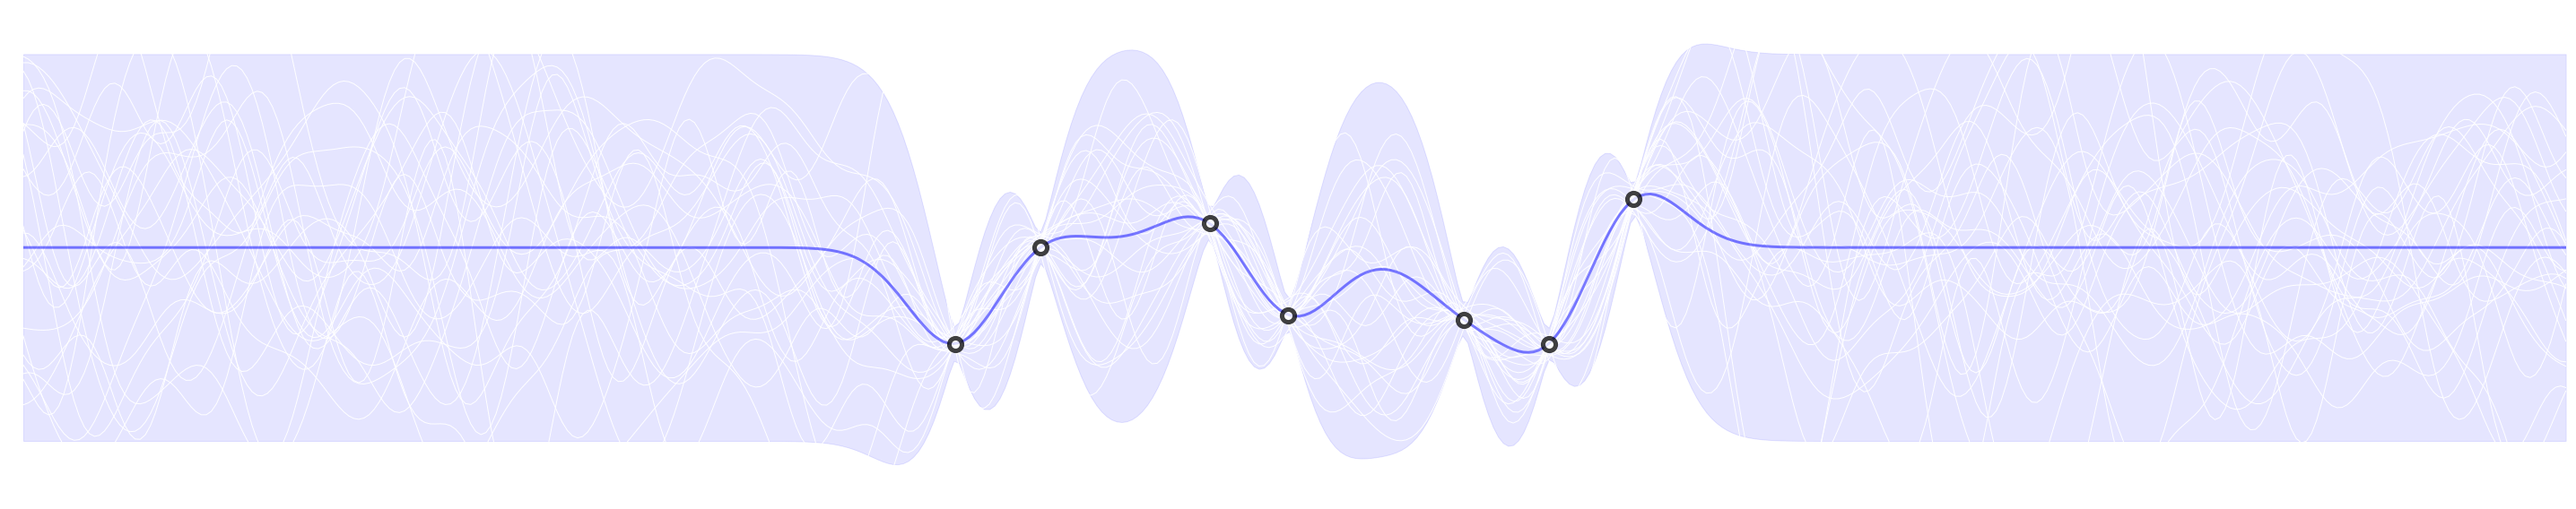

In [253]:
fig, ax = plt.subplots(1, 1, figsize=(40, 8))
ax.fill_between(test_x.data.numpy(), lower.data.numpy(), upper.data.numpy(), color='blue', alpha=0.1)
ax.plot(test_x.data.numpy(), samples.data.numpy(), color='white', linewidth=1)
ax.plot(test_x.data.numpy(), output.mean().data.numpy(), color='blue', linewidth=3, alpha=0.5)
ax.scatter(train_x.data.numpy(), train_y.data.numpy(), marker='o', color='white',
           edgecolor='black', s=200, zorder=10, linewidth=5, alpha=0.75)

ax.set_ylim([-2.5, 2.5])
ax.set_xlim([-15, 15])
ax.set_axis_off()
fig.tight_layout()

In [228]:
fig.savefig('background.png', transparent=True)